# RADMAP Package Tutorials - Antennas
--------

This notebook will show examples of how to use the RADMAP (Radar Modeling, Antenna, and Performance (Python)) package. This should allow you to gain experience with Python, Jupyter Notebooks, and radar theory.

Import required modules for this example.

In [1]:
import matplotlib.pyplot as plt
from antenna import Antenna, Linear, Planar, taylor

---------
Example 1
---------

Calculate an Antenna model for a generalized dish antenna with a diameter of 1.5 m and an operating frequency of 10 GHz.

In [2]:
DishAnt = Antenna(f=10e9, dim=1.5)

Print the structure of the resulting antenna model and also print the beamwidth.

In [3]:
# Display all parameters associated with antenna
print('\nDish Antenna Example 1')
print(DishAnt.__dict__)


Dish Antenna Example 1
{'f': 10000000000.0, 'lam': 0.03, 'rho': 0.6, 'h': 0, 'SL': 0.01, 'az0': 0.0, 'el0': 0.0, 'dim': 1.5, 'type': 'circular', 'A_ant': 1.7671458676442586, 'A_e': 1.0602875205865552, 'G': 14804.406601634037, 'BW': [0.022680460581325723, 0.022680460581325723]}


Print the meawidth of the resulting antenna

In [4]:
# Return antenna beamwidth
print('DishAnt Beamwidth = ' + str(DishAnt.get_BW()) + ' deg')

DishAnt Beamwidth = [1.2994946687227937, 1.2994946687227937] deg


---------
Example 2
---------

Calculate an Antenna model for a 1 m x 2 m rectangular array operating frequency of 5 GHz. Print the resulting model parameters and the directivity in dB.

In [5]:
RectAnt = Antenna(f=5e9, dim=(1, 2))

# Display all parameters associated with antenna
print('\nRectangular Antenna Example 2')
print(RectAnt.__dict__)

# Return directivity
print('RectAnt Directivity = ' + str(RectAnt.get_G(dB=True)) + ' dB')


Rectangular Antenna Example 2
{'f': 5000000000.0, 'lam': 0.06, 'rho': 0.6, 'h': 0, 'SL': 0.01, 'az0': 0.0, 'el0': 0.0, 'dim': (1, 2), 'type': 'rect', 'A_ant': 2, 'A_e': 1.2, 'G': 4188.790204786391, 'BW': [0.06030010454652231, 0.030150052273261153]}
RectAnt Directivity = 36.22088609302433 dB


---------
Example 3
---------

Calculate an Antenna model for an antenna with a 1 deg azimuth and 10 deg elevation beamwidth at 15 GHz. Print the resulting model parameters.

In [6]:
RectAnt2 = Antenna(f=15e9, BW=(5, 10))

# Display all parameters associated with antenna
print('\nRectangular Antenna Example 3')
print(RectAnt2.__dict__)


Rectangular Antenna Example 3
{'f': 15000000000.0, 'lam': 0.02, 'rho': 0.6, 'h': 0, 'SL': 0.01, 'az0': 0.0, 'el0': 0.0, 'BW': [0.08726646259971647, 0.17453292519943295], 'type': 'rect', 'G': 500.0, 'A_e': 0.015915494309189534, 'A_ant': 0.026525823848649224, 'dim': [0.23032943298089031, 0.11516471649044516]}


---------
Example 4
---------

Calculate an Antenna model for an antenna with a 5 deg azimuth and 10 deg elevation beamwidth at 15 GHz. Print the resulting model parameters.

In [7]:
RectAnt2 = Antenna(f=15e9, BW=(5, 10))

# Display all parameters associated with antenna
print('\nRectangular Antenna Example 3')
print(RectAnt2.__dict__)


Rectangular Antenna Example 3
{'f': 15000000000.0, 'lam': 0.02, 'rho': 0.6, 'h': 0, 'SL': 0.01, 'az0': 0.0, 'el0': 0.0, 'BW': [0.08726646259971647, 0.17453292519943295], 'type': 'rect', 'G': 500.0, 'A_e': 0.015915494309189534, 'A_ant': 0.026525823848649224, 'dim': [0.23032943298089031, 0.11516471649044516]}


---------
Example 5
---------

Calculate an Antenna model for a 20-element linear array operating at 1 GHz. The linear array uses 0.5 d/\lambda element spacing. 

Plot the resulting antenna directivity pattern for the uniform weighted array, then overplot the antenna directivity pattern after applying a 30 dB Taylor weighting for sidelobe suppression.

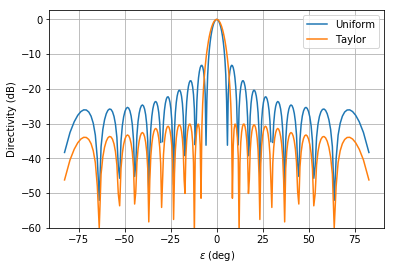

In [8]:
LinearArray1 = Linear(f=1e9, d2wl=0.5, N=20)
LinearArray1.plot_pattern(dB=True, norm=True, newFig=True)
LinearArray1.set_weight(taylor(LinearArray1.N))
LinearArray1.plot_pattern(dB=True, norm=True, newFig=False)
plt.legend(('Uniform', 'Taylor'))

Print the resulting beamwidth and directivity.

In [9]:
print('LinearArray1 beamwidth = ' + str(LinearArray1.get_BW()) + ' deg')
print('LinearArray1 directivity = ' + str(LinearArray1.get_G(dB=True)) + ' dB')

LinearArray1 beamwidth = 6.7298128418305865 deg
LinearArray1 directivity = 12.355332589691093 dB


---------
Example 6
---------

Create an antenna model for a 60 element x 40 element planar array with 0.5 and 0.8 d/\lambda spacing (rectangular packing) operating at 3 GHz. Plot the directivity pattern and idtentify the grating lobe locations when the beam is steered to the sine space location (u, v) = (0.4285, 0.25).


Maximum steering angles : (8.899428879811248, 14.477512185929923) deg
Ant beamwidth = [1.01850387 2.49501898] deg
Ant directivity = -28.490090480000863 dB


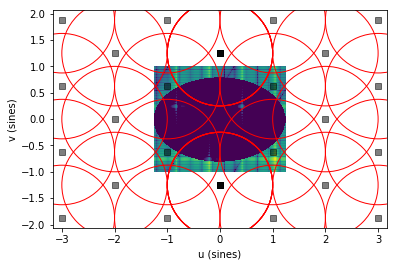

In [10]:
Ant = Planar(f=3e9, d2wl=(0.5, 0.8), N=(60, 40))
Ant.steer(u0=0.4285, v0=0.25)

# Plot image of antenna pattern
Ant.plot_pattern(pat='G', ang_unit='sines', dB=True, norm=True)

# Plot grating lobe pattern
Ant.plot_gl()

# Get maximum steering angles
print('Maximum steering angles : ' +
      str(Ant.get_max_steer()) + ' deg')

# Get beamwidth and directivity
print('Ant beamwidth = ' + str(Ant.get_BW()) + ' deg')
print('Ant directivity = ' + str(Ant.get_G(dB=True)) + ' dB')

---------
Example 7
---------

Create an antenna model for a 60 element x 40 element planar array with 0.5 and 0.8 $d/\lambda$ spacing (triangular packing) operating at 3 GHz. Plot the directivity pattern and idtentify the grating lobe locations when the beam is steered to the sine space location (u, v) = (0.4285, 0.25).


Maximum steering angles : (31.28817905521443, 29.507488693090558) deg


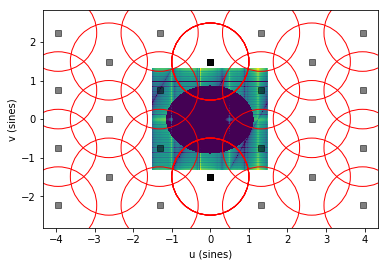

In [11]:
Ant = Planar(f=3e9, d2wl=(0.38, 0.67), N=(60, 40), packing='tri')
Ant.steer(az0=30, el0=0)

# Plot image of antenna pattern
Ant.plot_pattern(pat='G', ang_unit='sines', dB=True, norm=True)

# Plot grating lobe pattern
Ant.plot_gl()

# Get maximum steering angles
print('Maximum steering angles : ' + str(Ant.get_max_steer()) + ' deg')

---------
Example 8
---------

Create an antenna model for a 20-eleent linear array with 20 elements and a $d/\lambda$ of 1/2. Plot the directivity pattern in a variety of ways using cartesian, polar, dB, linear, normalized, and non-normalized parameters.


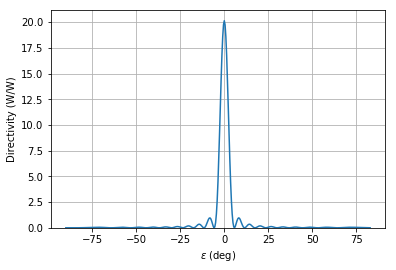

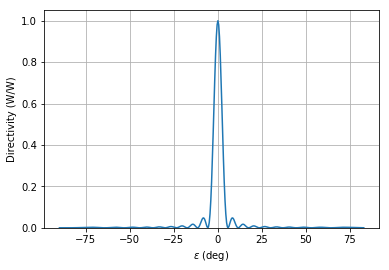

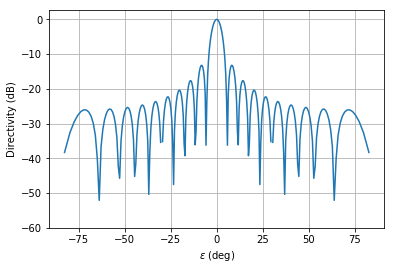

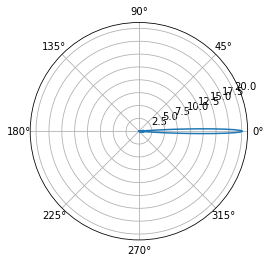

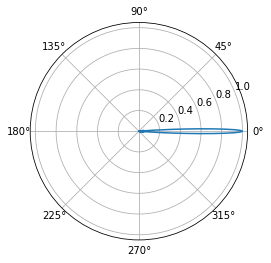

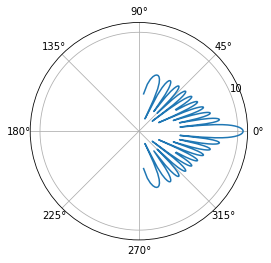

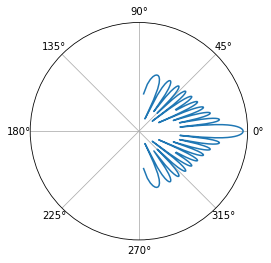

In [12]:
Linear(d2wl=0.5, N=20).plot_pattern(polar=False, dB=True, norm=False, ang_unit='deg')
Linear(d2wl=0.5, N=20).plot_pattern(polar=False, dB=True, norm=False, ang_unit='rad')
Linear(d2wl=0.5, N=20).plot_pattern(polar=False, dB=True, norm=False, ang_unit='sines')
Linear(d2wl=0.5, N=20).plot_pattern(polar=False, dB=False, norm=False)
Linear(d2wl=0.5, N=20).plot_pattern(polar=False, dB=False, norm=True)
Linear(d2wl=0.5, N=20).plot_pattern(polar=False, dB=True, norm=False)
Linear(d2wl=0.5, N=20).plot_pattern(polar=False, dB=True, norm=True)
Linear(d2wl=0.5, N=20).plot_pattern(polar=True, dB=False, norm=False)
Linear(d2wl=0.5, N=20).plot_pattern(polar=True, dB=False, norm=True)
Linear(d2wl=0.5, N=20).plot_pattern(polar=True, dB=True, norm=False)
Linear(d2wl=0.5, N=20).plot_pattern(polar=True, dB=True, norm=True)

---------
Example 9
---------
Create a linear array antenna with 51 elements. Steer the beam to -30 deg and apply a Taylor weighting. Plot the directivity patter, amplitude taper, and phase shifter settings.

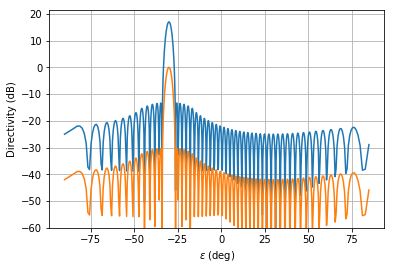

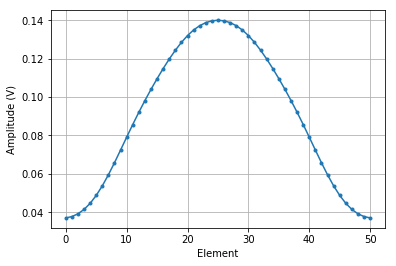

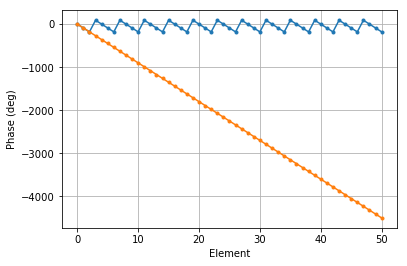

In [13]:
x = Linear(d2wl=0.5, N=51)
x.steer(-30)
x.set_weight(taylor(x.N))
x.plot_pattern(polar=False, dB=True, norm=False, ang_unit='deg', newFig=True)
x.plot_pattern(polar=False, dB=True, norm=True, ang_unit='deg', newFig=False)
x.plot_weights()
x.plot_phase()

---------
Example 10
---------
Create a planar array antenna with 60 elements spaced at $d/\lambda=0.8$ in the horizontal direction and 40 elements spaced at $d/\lambda=0.5$ in the vertical direction in a triangular packing. The antenna uses Taylor weighting. Steer the beam to (u, v) = (0.1, 0.1) in sine space. Plot the directivity pattern, grating lobe locations, weights, and phase across the array. Calculate the maximum steer angle without inducing grating lobes. Also, calculate the beamwidth of the array.

(-0.27831216351296784, 1.0)
[0.036926894352461576, 0.03644018737449249]
[2.11623633 2.08833129]


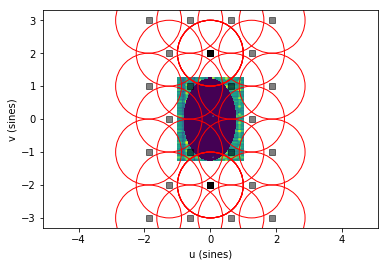

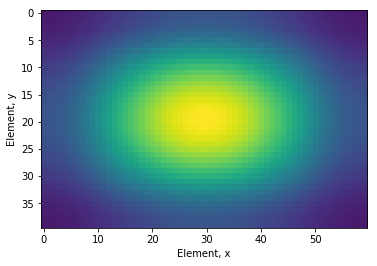

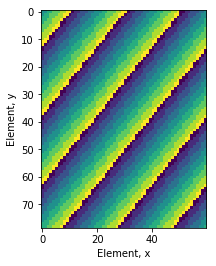

In [14]:
y = Planar(d2wl=(0.8, 0.50), N=(60, 40), packing='tri', npsb=3)
y.steer(u0=0.1, v0=0.1)
y.set_weight((taylor(60), taylor(40)))
y.plot_pattern(polar=False, dB=True, norm=False, newFig=True, ang_unit='sines')
y.plot_gl()
y.plot_weights()
y.plot_phase()
print(y.get_max_steer('sines'))
print(y.get_BW(unit='sines'))
print(y.get_BW(unit='deg'))